#### Cargar el Dataset

In [3]:
import pandas as pd

# Ruta del archivo
file_path = r'C:\Users\Sara\Documents\Programacion\prueba\Iris.csv'

# Cargar el dataset
dataset = pd.read_csv(file_path)

# Visualizar las primeras filas del dataset
print(dataset.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


#### Preparación de los Datos

In [4]:
# Seleccionar las columnas independientes (X) y la variable dependiente (y)
X = dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]  # Características
y = dataset['PetalLengthCm']  # Variable dependiente, por ejemplo

#### Dividir los Datos en Entrenamiento y Prueba

In [5]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar el tamaño de las particiones
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')


Tamaño del conjunto de entrenamiento: (120, 4)
Tamaño del conjunto de prueba: (30, 4)


#### Implementar el Algoritmo KNN para Regresión

In [6]:
import numpy as np

# Función para calcular la distancia euclidiana
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Número de vecinos (k)
k = 3

# Inicializar predicciones
y_pred = []

# Para cada muestra en el conjunto de prueba
for i in range(len(X_test)):
    # Obtener la muestra de prueba
    x_test = X_test.iloc[i].values

    # Calcular las distancias entre la muestra de prueba y todas las muestras de entrenamiento
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train.values]

    # Obtener los k vecinos más cercanos
    k_neighbors = np.argpartition(distances, k)[:k]

    # Extraer los valores correspondientes a esos k vecinos
    k_values = y_train.iloc[k_neighbors].values

    # Predecir el valor promedio de los k vecinos
    y_pred.append(np.mean(k_values))

# Convertir las predicciones a un array de NumPy
y_pred = np.array(y_pred)

# Verificar las predicciones
print("Predicciones:", y_pred)

Predicciones: [4.53333333 1.56666667 6.46666667 4.5        4.73333333 1.53333333
 3.9        5.36666667 4.76666667 4.06666667 5.16666667 1.46666667
 1.46666667 1.46666667 1.53333333 4.53333333 5.6        3.83333333
 4.36666667 5.46666667 1.5        4.9        1.6        5.46666667
 6.46666667 5.36666667 5.46666667 5.7        1.4        1.5       ]


#### Calcular el Error y Evaluar el Modelo

In [7]:
from sklearn.metrics import mean_squared_error

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')

Error Cuadrático Medio (MSE): 0.02888888888888894


#### Visualización de Predicciones

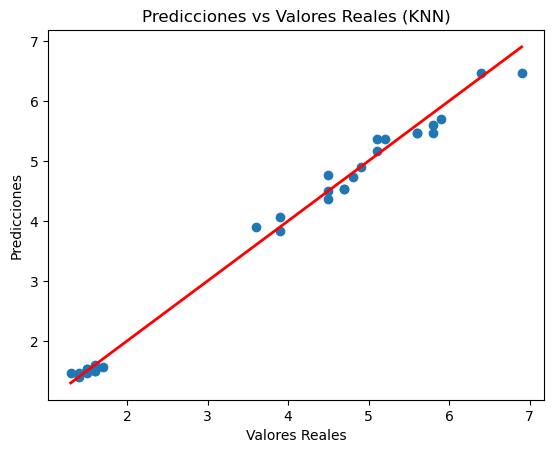

In [8]:
import matplotlib.pyplot as plt

# Graficar las predicciones vs los valores reales
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (KNN)')
plt.show()

# Ejercicio para puntos extra: Derivada numérica por diferencias centradas

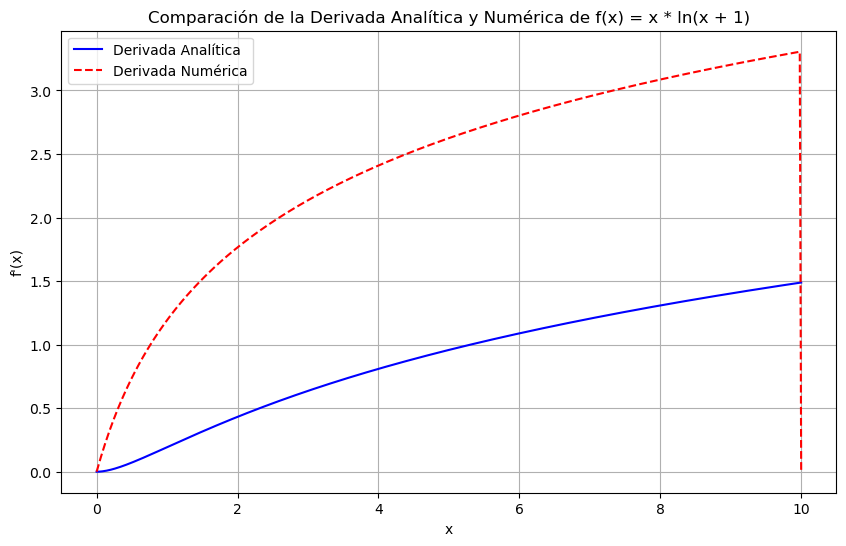

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función f(x) = x * ln(x + 1)
def f(x):
    return x * np.log(x + 1)

# Definir la derivada analítica de f(x)
def f_prime_analitica(x):
    return np.log(x + 1) - x / (x + 1)

# Crear el intervalo [0, 10] con 500 puntos
x_values = np.linspace(0, 10, 500)

# Calcular la derivada numérica usando diferencias centradas
h = x_values[1] - x_values[0]  # Tamaño del paso (espaciado entre puntos)
f_prime_numerica = (f(x_values[2:]) - f(x_values[:-2])) / (2 * h)  # Fórmula de diferencias centradas

# Agregar valores de frontera para la derivada numérica (en este caso los primeros y últimos puntos)
f_prime_numerica = np.concatenate(([0], f_prime_numerica, [0]))

# Calcular la derivada analítica para comparación
f_prime_analitica_values = f_prime_analitica(x_values)

# Graficar la derivada numérica y la analítica
plt.figure(figsize=(10, 6))
plt.plot(x_values, f_prime_analitica_values, label='Derivada Analítica', color='blue')
plt.plot(x_values, f_prime_numerica, label='Derivada Numérica', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.title('Comparación de la Derivada Analítica y Numérica de f(x) = x * ln(x + 1)')
plt.legend()
plt.grid(True)
plt.show()